In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
#from openmm import app
#import openmm as mm
#from openmm import unit as u
import pdbfixer
#import mdshare
#from sys import stdout
from scipy.spatial.distance import pdist,squareform

In [10]:
#simulation_traj = md.load('data/output.pdb')
petide_in_water = md.load('data/peptide_model_water.pdb')
simulation_traj = md.load_dcd('data/output.dcd',top=petide_in_water.top)
traj_ANP = md.load('data/peptide_fixed.pdb')
simulation_log_head = np.loadtxt('data/mm.log',dtype=str,max_rows=1,delimiter=',',comments=None)
simulation_log = np.loadtxt('data/mm.log',delimiter=',')

In [11]:
sim_time = simulation_log[:,1]

In [12]:
traj_ANP_rsmf = traj_ANP.top.select('name CA')

traj_ANP_traj_rsmf = traj_ANP.atom_slice(traj_ANP_rsmf)

In [17]:
#petide_simulation_traj_rsmf,traj_ANP_traj_rsmf

In [18]:
#(petide_simulation_traj,traj_ANP)

In [19]:
#Cutting out the petide to do the rmsd
simulation_top = simulation_traj.top
selection_simulation = simulation_top.select('chainid 0')
petide_simulation_traj = simulation_traj.atom_slice(selection_simulation)

In [20]:
petide_simulation_top = petide_simulation_traj.top
selection_petide_simulation_top = petide_simulation_top.select('name CA')
petide_simulation_traj_rsmf = petide_simulation_traj.atom_slice(selection_petide_simulation_top)

In [21]:
petide_simulation_traj[0],traj_ANP_traj_rsmf

(<mdtraj.Trajectory with 1 frames, 287 atoms, 21 residues, and unitcells at 0x7fad8e771c40>,
 <mdtraj.Trajectory with 1 frames, 21 atoms, 21 residues, and unitcells at 0x7fad8dd332e0>)

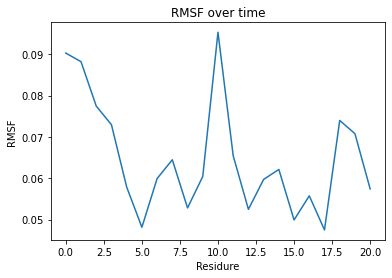

In [23]:
petide_simulation_top = petide_simulation_traj.top
selection_petide_simulation_top = petide_simulation_top.select('name CA')
petide_simulation_traj_rsmf = petide_simulation_traj.atom_slice(selection_petide_simulation_top)



#rmsf = md.rmsf(petide_simulation_traj_rsmf,traj_ANP)
rmsf = md.rmsf(petide_simulation_traj_rsmf,traj_ANP_traj_rsmf)

plt.plot(rmsf)
plt.xlabel('Residure')
plt.ylabel('RMSF')
plt.title('RMSF over time')
plt.show()

In [138]:
rmsf

array([0.07448444, 0.06644192, 0.06806602, 0.06514067, 0.07475578,
       0.05316038, 0.05789908, 0.0403402 , 0.05737747, 0.0442879 ,
       0.05661701, 0.03729597, 0.05075197, 0.05693714, 0.06336279,
       0.06906381, 0.05100409, 0.04205372, 0.06264994, 0.06799787,
       0.06112164], dtype=float32)

In [99]:
rmsd = md.rmsd(petide_simulation_traj,traj_ANP)

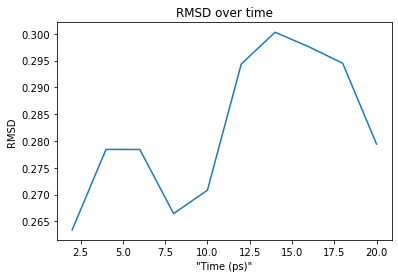

In [100]:
plt.plot(sim_time,rmsd)
plt.xlabel(simulation_log_head[1])
plt.ylabel('RMSD')
plt.title('RMSD over time')
plt.show()

In [24]:
def compute_distances(pos):
    """Compute all distances between the atoms in each structures using scipy's `pdist` function.
    
    pos: [n_structures, n_atoms, 3]
    return: [n_structures, n_distances]
    """
    pos = np.asarray(pos)
    X = []
    for ii in range(pos.shape[0]):
        d = pdist(pos[ii])
        X.append(d)
    return np.asarray(X)

def compute_gyration_radius(pos):
    """Compute the gyration radius associated with each structures.
    
    pos: [n_structures, n_atoms, 3]
    return: [n_structures, ]
    """
    pos = np.asarray(pos)
    gyration_radius = []
    for ii in range(pos.shape[0]):
        d2 = pdist(pos[ii]) ** 2
        S = np.sqrt(d2.sum() / (pos.shape[1]+1)**2)
        gyration_radius.append(S)
    gyration_radius = np.array(gyration_radius)
    return gyration_radius

In [34]:
pos = simulation_traj.xyz

In [27]:
#len(pos[0])

In [28]:
simulation_traj.topology 

<mdtraj.Topology with 3 chains, 2604 residues, 8034 atoms, 5453 bonds at 0x7fad8f8de910>

In [29]:
Sim_R_o_G = md.formats.PDBTrajectoryFile('data/output.pdb')

#simulation_top = simulation_traj.top
selection_simulation = Sim_R_o_G.topology.select('chainid 0')#.atom_slice(selection_simulation)

#md.atom_slice(selection_simulation)

petide_simulation_traj_ = simulation_traj#.atom_slice(selection_simulation)

In [78]:
pos = Sim_R_o_G.positions[:,selection_simulation]*0.1

In [79]:
#selection_simulation = Sim_R_o_G.topology.select('chainid 0').atom_slice(selection_simulation)

In [80]:
#compute_distances(pos)

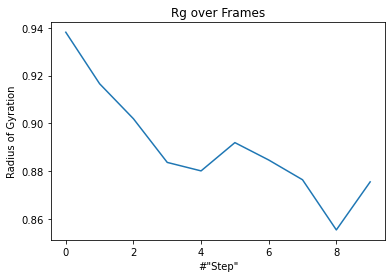

In [81]:
plt.plot(compute_gyration_radius(pos))

plt.xlabel(simulation_log_head[0])
plt.ylabel('Radius of Gyration')
plt.title('Rg over Frames')
plt.show()

In [63]:
rmsf = md.rmsf(selection_simulation,traj_ANP)

plt.plot(rmsf,'o')
plt.xlabel('Residure')
plt.ylabel('RMSF')
plt.title('RMSF over time')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'xyz'

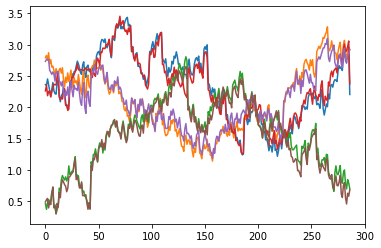

In [147]:
plt.plot(pos[0])
plt.plot(pos[9])

In [148]:
def Einstein_coef(pos):
    
    

IndentationError: expected an indented block (3628262203.py, line 3)

In [168]:
E=[]
for i in range(1,len(np.array(pos))):
    
    E.append(abs(pos[i]-pos[0])**2)
    E_C = np.mean(E)

In [169]:
len(pos[0])

287

In [173]:
np.mean(np.sum(E))/len(pos[0])

0.2440322092334495